In [6]:
import copy
from neuralnet import *
from checker import *
import matplotlib.pyplot as plt
import numpy as np

## Data Normalization and Label one hot encoding

In [3]:
# Importing train images 
images, labels = load_data('./', mode = 'train')
# shuffling the training dataset
N = np.random.permutation(np.arange(labels.shape[0]))
images = images[N,:]
labels = labels[N]

# pick the first 10000 data for validation
val_images = images[0:10000,:]
val_labels = labels[0:10000]

# normalizing the images and one_hot encoding the labels (validation set)
val_images = normalize_data(val_images)
val_labels = one_hot_encoding(val_labels)

# leave the rest of the data for training
train_images = images[10000:,:]
train_labels = labels[10000:]

# normalizing the images and one_hot encoding the labels (train set)
train_images = normalize_data(train_images)
train_labels = one_hot_encoding(train_labels)

# Importing test images
test_images, test_labels = load_data('./', mode = 't10k')

# shuffling the test dataset
N = np.random.permutation(np.arange(test_labels.shape[0]))


test_images = test_images[N,:]
test_labels = test_labels[N]

# normalizing the images and one_hot encoding the labels (test set)
test_images = normalize_data(test_images)
test_labels = one_hot_encoding(test_labels)

## Loading Cnfig file and Model

In [4]:
config = load_config('./')
model = Neuralnetwork(config)

## Training and Validation 

At Epoch 0 train_loss is:  0.0958157230679 val_loss is:  0.0652988935817
At Epoch 1 train_loss is:  0.0518942594827 val_loss is:  0.0592477707536
At Epoch 2 train_loss is:  0.0504591260813 val_loss is:  0.0555653371563
At Epoch 3 train_loss is:  0.0770158301827 val_loss is:  0.0529984856717
At Epoch 4 train_loss is:  0.0786840636258 val_loss is:  0.0511572781739
At Epoch 5 train_loss is:  0.0506757875508 val_loss is:  0.0516965770102
At Epoch 6 train_loss is:  0.0576406642203 val_loss is:  0.0476424071658
At Epoch 7 train_loss is:  0.0448102219203 val_loss is:  0.0451094724889
At Epoch 8 train_loss is:  0.0420380272681 val_loss is:  0.0441897942125
At Epoch 9 train_loss is:  0.038164217529 val_loss is:  0.0468896830274
At Epoch 10 train_loss is:  0.0446293141793 val_loss is:  0.0438930234704
At Epoch 11 train_loss is:  0.0503890695723 val_loss is:  0.0439239750368
At Epoch 12 train_loss is:  0.0365967920317 val_loss is:  0.0416159182658
At Epoch 13 train_loss is:  0.0606690342033 val_l

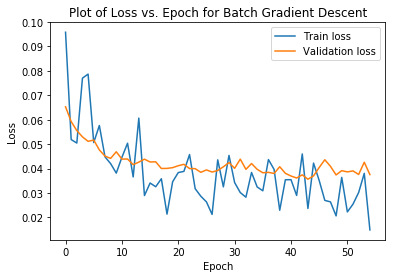

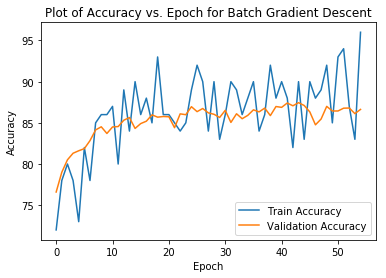

In [5]:
best_val_loss, best_epoch, params = train(model, train_images, train_labels, val_images, val_labels, config)

## Calculating the Accuracy of the Test Dataset

In [7]:
test_accuracy = test(params, test_images, test_labels.T)

In [8]:
test_accuracy

86.209999999999994

## Numerical Approximation

In [9]:
print(model.layers[0].w.shape)
print(len(model.layers))

tests = [(-1, 'b', (0,0)), (-3, 'b', (0,0)), (-1, 'w', (0,0)), (-1, 'w', (1,0)), (0, 'w', (0,0)), (0, 'w', (1,0))]
epsilon = 0.01
descs = ['output bias', 'hidden bias', 'hidden output1', 'hidden output2', 'hidden input1', 'hidden input2']

for idx, test in enumerate(tests):
    print(descs[idx])
    layer_idx = test[0]
    weight_type = test[1]
    weight_idx = test[2]
    
    seen_classes = set()
    xsamples = []
    ysamples = []
    for i in range(len(train_images)):
        xsample = train_images[i].reshape((-1,1))
        ysample = train_labels[i].reshape((-1,1))
        temp = np.argwhere(ysample)
        yclass = temp[0][0]
        if yclass not in seen_classes:
            ysamples.append(ysample)
            xsamples.append(xsample)
            seen_classes.add(yclass)
        if len(seen_classes) == 10:
            break
    
#     print(ysample.shape)
    
    for i in range(len(ysamples)):
        xsample = xsamples[i]
        ysample = ysamples[i]
        
        print('For sample # ', i + 1)
    
        model1 = copy.deepcopy(model)
        model1.forward(xsample, ysample)
        model1.backward()
        if weight_type == 'w':
            grad1 = model1.layers[layer_idx].v_w[weight_idx]
        elif weight_type == 'b':
            grad1 = model1.layers[layer_idx].v_b[weight_idx]
        
        model0 = copy.deepcopy(model)

        if weight_type == 'w':
            model0.layers[layer_idx].w += epsilon
            output, loss1 = model0.forward(xsample, ysample)
            model0.layers[layer_idx].w -= 2*epsilon
            output, loss2 = model0.forward(xsample, ysample)
            slope = (loss1 - loss2) / (2*epsilon)
        else:
            model0.layers[layer_idx].w += epsilon
            output, loss1 = model0.forward(xsample, ysample)
            model0.layers[layer_idx].w -= 2*epsilon
            output, loss2 = model0.forward(xsample, ysample)
            slope = (loss1 - loss2) / (2*epsilonon)

        print('grad1: ', grad1)
        print('slope: ', slope)
        print('grad1 - slope: ', grad1 - slope)
        print('eps square: ', epsilon**2)
    
#     break

(50, 784)
3
output bias
For sample #  1
grad1:  7.76475368851e-06
slope:  -1.66533453694e-14
grad1 - slope:  7.76475370517e-06
eps square:  0.0001
For sample #  2
grad1:  -0.0999999464007
slope:  0.0
grad1 - slope:  -0.0999999464007
eps square:  0.0001
For sample #  3
grad1:  3.41166060527e-06
slope:  -1.11022302463e-14
grad1 - slope:  3.41166061637e-06
eps square:  0.0001
For sample #  4
grad1:  0.00444393933876
slope:  -1.11022302463e-14
grad1 - slope:  0.00444393933877
eps square:  0.0001
For sample #  5
grad1:  5.26274621354e-06
slope:  -1.11022302463e-14
grad1 - slope:  5.26274622464e-06
eps square:  0.0001
For sample #  6
grad1:  1.12610803164e-09
slope:  0.0
grad1 - slope:  1.12610803164e-09
eps square:  0.0001
For sample #  7
grad1:  4.87333152295e-05
slope:  8.32667268469e-15
grad1 - slope:  4.87333152212e-05
eps square:  0.0001
For sample #  8
grad1:  0.000136228513469
slope:  1.11022302463e-14
grad1 - slope:  0.000136228513458
eps square:  0.0001
For sample #  9
grad1:  2.62